# SymbolicRegressor Class API Reference  
*Class for genetic programming-based symbolic regression*  

**Class Definition**  
```python
class gplearn.genetic.SymbolicRegressor(
    *, 
    population_size=1000, 
    generations=20, 
    tournament_size=20, 
    stopping_criteria=0.0, 
    const_range=(-1.0, 1.0), 
    init_depth=(2, 6), 
    init_method='half and half', 
    function_set=('add', 'sub', 'mul', 'div'), 
    metric='mean absolute error', 
    parsimony_coefficient=0.001, 
    p_crossover=0.9, 
    p_subtree_mutation=0.01, 
    p_hoist_mutation=0.01, 
    p_point_mutation=0.01, 
    p_point_replace=0.05, 
    max_samples=1.0, 
    feature_names=None, 
    warm_start=False, 
    low_memory=False, 
    n_jobs=1, 
    verbose=0, 
    random_state=None
)
```
**Inheritance**: Inherits from `sklearn.base.BaseEstimator`, enabling compatibility with scikit-learn utilities like `cross_val_score` and pipelines.

---

## Class Description  
A genetic programming (GP) estimator that evolves mathematical formulas to fit data. Programs are represented as **expression trees** where internal nodes are mathematical operations and leaf nodes are variables or constants. The algorithm evolves populations of formulas over generations using genetic operations (crossover, mutation) to optimize fitness. Key advantages include model interpretability and the ability to discover non-linear relationships without predefined structure.

---

## Key Parameters  

### Algorithm Configuration  
- **population_size** *(int, default=1000)*  
  Number of programs (formulas) in each generation.  
  - Larger values increase diversity and computational cost.  
  - Too small → premature convergence; too large → slow training.  

- **generations** *(int, default=20)*  
  Number of evolutionary iterations.  
  - Each generation refines the population via selection and genetic operations.  
  - Early stopping may occur if `stopping_criteria` is met.  

- **tournament_size** *(int, default=20)*  
  Number of programs randomly selected to compete in each tournament for selection.  
  - Higher values favor fitter programs but reduce diversity.  
  - Tournament winners become parents for the next generation.  

- **stopping_criteria** *(float, default=0.0)*  
  Training stops early if the best program's fitness reaches this threshold.  
  - Example: `stopping_criteria=0.01` stops if fitness ≤ 0.01 (for error metrics).  
  - Set to `0.0` to disable and train for all `generations`.  

---

### Formula Initialization  
- **const_range** *(tuple/None, default=(-1.0, 1.0))*  
  Range for randomly generated constants in formulas.  
  - Example: `const_range=(0, 10)` → constants sampled uniformly from [0, 10].  
  - `None` disables constants; formulas use only input features.  

- **init_depth** *(tuple, default=(2, 6))*  
  Minimum and maximum initial depth of expression trees.  
  - Depth = number of levels in the tree. A tree with depth 2: `add(x1, x2)`.  
  - Combines with `init_method` to control initial formula complexity.  

- **init_method** *({'grow', 'full', 'half and half'}, default='half and half')*  
  Strategy for generating initial population:  
  - **'grow'**: Trees grow asymmetrically with mixed function/terminal nodes.  
  - **'full'**: Trees are "bushy" with functions until `init_depth[1]` is reached.  
  - **'half and half'**: 50% of population uses 'grow', 50% uses 'full'.  

---

### Function Set  
- **function_set** *(iterable, default=('add', 'sub', 'mul', 'div'))*  
  Allowed mathematical operations. Supported functions:  

  | Function  | Arity | Behavior                                                                 |
  |-----------|-------|--------------------------------------------------------------------------|
  | add/sub   | 2     | Standard addition/subtraction.                                           |
  | mul/div   | 2     | Protected division: returns 1.0 if denominator is near zero.             |
  | sqrt      | 1     | Protected sqrt: uses `sqrt(abs(x))`.                                     |
  | log       | 1     | Protected log: `log(abs(x))`; returns 0 if x ≈ 0.                        |
  | abs/neg   | 1     | Absolute value and negation (`-x`).                                      |
  | inv       | 1     | Protected reciprocal: `1/x` if x ≠ 0; else 0.                            |
  | max/min   | 2     | Maximum or minimum of two inputs.                                        |
  | sin/cos/tan | 1  | Trigonometric functions (inputs in radians).                             |

  **Note**: Custom functions can be added using `gplearn.functions.make_function`.

---

### Fitness & Evolution  
- **metric** *(str, default='mean absolute error')*  
  Fitness metric to evaluate programs:  
  - **Error-based**: `'mean absolute error'` (MAE), `'mse'` (Mean Squared Error), `'rmse'` (Root MSE).  
  - **Correlation-based**: `'pearson'` (Pearson’s r), `'spearman'` (Spearman’s ρ).  
    - Maximizes correlation between predicted and true `y` (useful for noisy data).  

- **parsimony_coefficient** *(float/"auto", default=0.001)*  
  Penalty term to favor simpler formulas and combat bloat (overly complex trees).  
  - Adjusted fitness = raw fitness + `parsimony_coefficient` × program size.  
  - `"auto"`: Sets coefficient as `Covariance(fitness, size) / Variance(size)`.  

---

### Genetic Operations  
Probabilities for genetic operations **must sum to ≤ 1.0**. The remaining probability is for cloning (replicating parents).  

- **p_crossover** *(float, default=0.9)*  
  Probability of crossover: swaps subtrees between two parents to create offspring.  

- **p_subtree_mutation** *(float, default=0.01)*  
  Probability of subtree mutation: replaces a random subtree with a new random tree.  

- **p_hoist_mutation** *(float, default=0.01)*  
  Probability of hoist mutation: removes redundant subtrees by lifting a subtree to its parent node.  

- **p_point_mutation** *(float, default=0.01)*  
  Probability of point mutation: randomly replaces nodes in the tree (e.g., changing `add` to `mul`).  

- **p_point_replace** *(float, default=0.05)*  
  During point mutation, the probability of replacing each node. Higher values lead to more aggressive mutations.  

---

### Optimization & Parallelism  
- **max_samples** *(float, default=1.0)*  
  Fraction of training data used for fitness evaluation.  
  - `0.9` → 90% of data is randomly subsampled each generation.  
  - Introduces stochasticity to reduce overfitting.  

- **n_jobs** *(int, default=1)*  
  Number of CPU cores for parallel fitness evaluation.  
  - `-1` → all available cores.  
  - Parallelism significantly speeds up large populations/generations.  

- **low_memory** *(bool, default=False)*  
  Reduces memory usage by discarding ancestors of the current population.  
  - Disables analysis of generational history.  

- **warm_start** *(bool, default=False)*  
  If `True`, reuse the previous population for subsequent calls to `fit()`.  

- **verbose** *(int, default=0)*  
  Controls verbosity of training output:  
  - `0`: No output.  
  - `1`: Print progress per generation.  
  - `2`: Log detailed metrics (e.g., fitness, tree size).  

- **random_state** *(int/None, default=None)*  
  Seed for reproducibility. Fixes random number generation for consistent results.  

---

## Attributes  

- **run_details_** *(dict)*  
  Metadata about the evolutionary process, updated after each generation:  
  - `generation`: Current generation index (0 to `generations-1`).  
  - `average_length`: Average number of nodes in the population’s programs.  
  - `average_fitness`: Average fitness (lower is better for error metrics).  
  - `best_length`: Node count of the best program in the population.  
  - `best_fitness`: Fitness score of the best program.  
  - `best_oob_fitness`: Out-of-bag fitness (if `max_samples` < 1.0).  
  - `generation_time`: Time (seconds) taken to evolve the generation.  

- **program** *(str)*  
  The best evolved formula (accessible via `_program` or `__str__()` method).  

---

## Key Methods  

### `fit(X, y, sample_weight=None)`  
Train the symbolic regressor on input data `X` and target `y`.  

**Parameters**:  
- **X** *(array-like, shape (n_samples, n_features))*: Training data.  
- **y** *(array-like, shape (n_samples,))*: Target values.  
- **sample_weight** *(array-like, shape (n_samples,), optional)*: Weights for samples.  

**Returns**:  
- **self** *(SymbolicRegressor)*: Trained instance.  

**Notes**:  
- Input data is automatically validated and converted to floating-point.  
- Large datasets (>10k samples) may require tuning `population_size` and `generations`.  

---

### `predict(X)`  
Predict target values for input samples using the best evolved formula.  

**Parameters**:  
- **X** *(array-like, shape (n_samples, n_features))*: Test data.  

**Returns**:  
- **y** *(array, shape (n_samples,))*: Predicted values.  

**Notes**:  
- If the formula includes protected operations (e.g., `div`), predictions may not raise errors for invalid inputs (e.g., division by zero).  

---

### `score(X, y, sample_weight=None)`  
Compute the **R² coefficient of determination** for predictions.  

**Parameters**:  
- **X** *(array-like)*: Test samples.  
- **y** *(array-like)*: True targets.  
- **sample_weight** *(array-like, optional)*: Sample weights.  

**Returns**:  
- **R²** *(float)*: Proportion of variance explained by the model.  

**Notes**:  
- R² = 1.0 → perfect prediction; ≤0.0 → worse than a constant model.  

---

### Parameter Management  
- **`get_params(deep=True)`**: Returns a dict of parameter settings.  
- **`set_params(**params)`**: Update parameters (e.g., `set_params(generations=50)`).  

**Inherited from `sklearn.base.BaseEstimator`**, enabling integration with hyperparameter tuning tools like `GridSearchCV`.

--- 

In [1]:
# Importing libraries
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress = True, precision = 4)

# Suppress FutureWarnings from scikit-learn
import warnings
warnings.filterwarnings("ignore", category = FutureWarning, module = "sklearn.base")

Let's explore first the case of a basic dataset noise-free

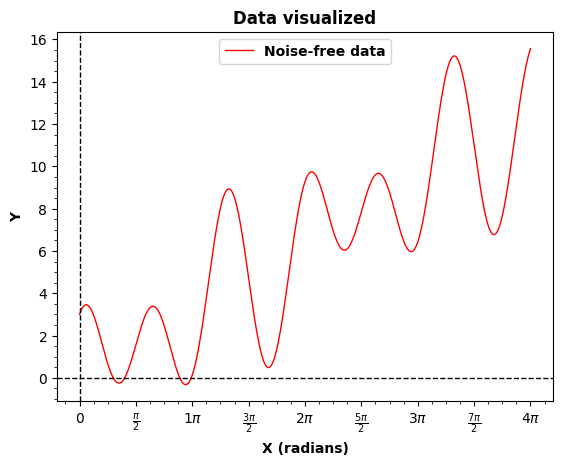

In [2]:
# Creating synthetic noise-free data
x = np.linspace(0, 4 * np.pi, 500)
y = 2 * np.sin(2 * x) + 3 * np.cos(3 * x) + x

# Plotting
plt.plot(x, y, linestyle = "solid", linewidth = 1, color = "red", label = "Noise-free data")
plt.axhline(linestyle = "dashed", linewidth = 1, color = "black")
plt.axvline(linestyle = "dashed", linewidth = 1, color = "black")

# Customize x-ticks to show radians in terms of π
x_ticks = np.arange(0, 4 * np.pi + np.pi / 2, np.pi / 2)  # Ticks every π/2
x_labels = [rf"${int(k / np.pi) if k / np.pi == int(k / np.pi) else ""} \pi$" if k != 0 else "0" 
            for k in x_ticks]
x_labels = [
    "0" if tick == 0 else
    r"$\frac{\pi}{2}$" if tick == np.pi / 2 else
    r"$\frac{3\pi}{2}$" if tick == 3 * np.pi / 2 else
    rf"${int(tick / np.pi)}\pi$" if tick / np.pi == int(tick / np.pi) else
    rf"$\frac{{ {int(tick / (np.pi / 2))} \pi }}{{2}}$"
    for tick in x_ticks
]

plt.xticks(x_ticks, x_labels)
plt.minorticks_on()  # Show minor ticks for better granularity

plt.legend(loc = "best", prop = {"weight": "bold", "size": 10})
plt.title("Data visualized", fontweight = "bold", fontsize = 12)
plt.xlabel("X (radians)", fontweight = "bold", fontsize = 10)
plt.ylabel("Y", fontweight = "bold", fontsize = 10)
plt.grid(False)
plt.show()

In [3]:
# Reshaping data for the network
x = x.reshape(-1, 1)
y = y.flatten()

# Splitting our dataset into training data and testing data: 80/20 strategy
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    train_size = 0.8,
    random_state = 47,
    shuffle = True
)

In [ ]:
# Calling the SymbolicRegressor builder
sr = SymbolicRegressor(
    population_size = 3000, 
    generations = 12, 
    tournament_size = 25, 
    stopping_criteria = 0.01, 
    const_range = (0, 4), 
    init_depth = (2, 6), 
    init_method = "half and half", 
    function_set = ("add", "cos", "sin"),
    metric = "mean absolute error", 
    parsimony_coefficient = 0.01, 
    p_crossover = 0.9, 
    p_subtree_mutation = 0.01, 
    p_hoist_mutation = 0.01, 
    p_point_mutation = 0.01, 
    p_point_replace = 0.05, 
    max_samples = 0.8, 
    feature_names = ["x"], 
    warm_start = False, 
    low_memory = False, 
    n_jobs = - 1, 
    verbose = 1, 
    random_state = 47
)

sr.fit(x_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.48          5.89836       10          2.10598          2.09226      1.19m
   1    12.65          4.63799        9           2.0358          2.42431     52.22s
   2     6.02          3.72729       13          1.91273            1.984     53.71s
   3     2.37          2.71791       12          1.60026          1.69939     38.94s
   4     2.28          2.54275       10          1.54097          1.82416     32.65s
   5     6.92          3.71995       15          1.30385          1.48661     32.02s
   6    11.25          3.86801       24         0.802363         0.866393     24.54s
   7    15.34          3.85876       29         0.635129         0.664442     22.43s
   8    18.27          3.91491       34        0.0735054        0.0823303  

SymbolicRegressor(const_range=(0, 4), feature_names=['x'],
                  function_set=('add', 'cos', 'sin'), generations=12,
                  max_samples=0.8, n_jobs=-1, parsimony_coefficient=0.01,
                  population_size=3000, random_state=47, stopping_criteria=0.01,
                  tournament_size=25, verbose=1)

The result is exactly in this scenario: $2 \sin(2 x) + 3 \cos(3 x) + x$

| **Column**          | **Description**                                                                                     |
|---------------------|-----------------------------------------------------------------------------------------------------|
| **Gen**             | Generation number in the evolutionary process.                                                     |
| **Population Avg**  | - **Length**: Average node count of all expressions.<br>- **Fitness**: Average MAE of the population. |
| **Best Individual** | - **Length**: Node count of the best expression.<br>- **Fitness**: MAE of the best expression.<br>- **OOB Fitness**: Validation MAE (if enabled). |
| **Time Left**       | Estimated time to complete remaining generations.                                                  |

##### MAE stands for "Mean Absolute Error" and OOB for "Out Of Bag" data
---

In [5]:
# Score with training data
print(f"{sr.score(x_train, y_train):.3f}")

1.000


In [6]:
# Score with test data
print(f"{sr.score(x_test, y_test):.3f}")

1.000


In [7]:
# Predictions made
y_pred = sr.predict(x_test)
y_pred

array([ 7.2092,  0.7853,  8.393 , -0.1137,  8.4308,  7.5435,  3.1478,
        0.8827,  0.3238,  4.6189,  3.4128,  5.0376,  8.7691,  7.6434,
        3.8497,  0.5567,  5.9764,  6.3364,  1.5064,  1.7547,  7.7991,
        8.9353,  9.6595,  9.6672,  1.508 , 10.5512, 13.2594,  2.6477,
        0.5288,  7.0143,  0.4317,  7.6947,  6.9812,  9.2312,  5.9738,
        3.211 ,  6.524 ,  6.5233,  3.4434,  3.0202, 14.7479, 14.7306,
        6.2266,  8.4412,  7.2388,  9.023 ,  9.8268,  6.0348, 14.8768,
        7.3326,  7.8807,  6.4316, 12.8277,  8.1734,  6.7734,  9.6612,
        8.6507,  9.6047,  8.1303,  0.6393,  6.7469,  6.9104, 13.5992,
        0.052 , 12.3902,  6.0878, 14.6511,  2.5222,  3.2176,  8.6053,
        6.2585,  1.1482,  1.4772,  6.8353,  6.9054,  1.1888,  1.7208,
        2.6794,  9.6566, -0.165 , 12.5491,  7.7301,  8.928 , 12.9234,
        1.6652,  8.6624, 15.5664, -0.2693,  8.3912,  9.4673,  9.6742,
        2.3902,  6.0376, 14.5171,  1.2465,  1.0196,  7.4237,  8.2355,
       -0.2957, 14.7

In [8]:
# testing data paragon
y_test

array([ 7.2092,  0.7853,  8.393 , -0.1137,  8.4308,  7.5435,  3.1478,
        0.8827,  0.3238,  4.6189,  3.4128,  5.0376,  8.7691,  7.6434,
        3.8497,  0.5567,  5.9764,  6.3364,  1.5064,  1.7547,  7.7991,
        8.9353,  9.6595,  9.6672,  1.508 , 10.5512, 13.2594,  2.6477,
        0.5288,  7.0143,  0.4317,  7.6947,  6.9812,  9.2312,  5.9738,
        3.211 ,  6.524 ,  6.5233,  3.4434,  3.0202, 14.7479, 14.7306,
        6.2266,  8.4412,  7.2388,  9.023 ,  9.8268,  6.0348, 14.8768,
        7.3326,  7.8807,  6.4316, 12.8277,  8.1734,  6.7734,  9.6612,
        8.6507,  9.6047,  8.1303,  0.6393,  6.7469,  6.9104, 13.5992,
        0.052 , 12.3902,  6.0878, 14.6511,  2.5222,  3.2176,  8.6053,
        6.2585,  1.1482,  1.4772,  6.8353,  6.9054,  1.1888,  1.7208,
        2.6794,  9.6566, -0.165 , 12.5491,  7.7301,  8.928 , 12.9234,
        1.6652,  8.6624, 15.5664, -0.2693,  8.3912,  9.4673,  9.6742,
        2.3902,  6.0376, 14.5171,  1.2465,  1.0196,  7.4237,  8.2355,
       -0.2957, 14.7

In [9]:
# Mean difference
print(np.mean(abs(y_test - y_pred)))

7.348288644237755e-16


In [10]:
# Std difference
print(np.std(abs(y_test - y_pred)))

7.603897532001125e-16


Let's now see a noisy dataset, characterized by normal fluctuations

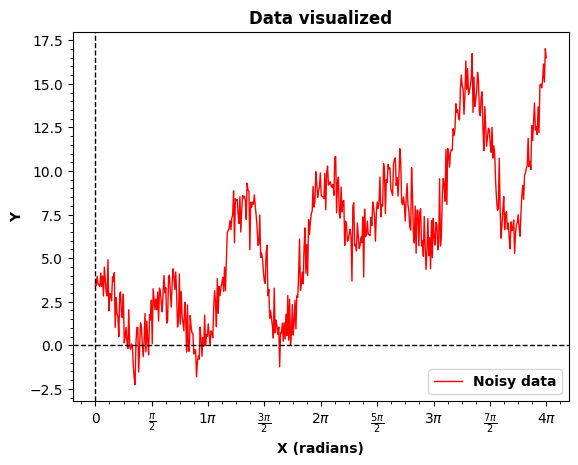

In [11]:
# Creating synthetic noisy data
x = x.reshape(-1)

noise = np.random.normal(loc = 0, scale = 1, size = len(x))
y = y.reshape(-1) + noise

# Plotting
plt.plot(x, y, linestyle = "solid", linewidth = 1, color = "red", label = "Noisy data")
plt.axhline(linestyle = "dashed", linewidth = 1, color = "black")
plt.axvline(linestyle = "dashed", linewidth = 1, color = "black")

# Customize x-ticks to show radians in terms of π
x_ticks = np.arange(0, 4 * np.pi + np.pi / 2, np.pi / 2)  # Ticks every π/2
x_labels = [rf"${int(k / np.pi) if k / np.pi == int(k / np.pi) else ""} \pi$" if k != 0 else "0" 
            for k in x_ticks]
x_labels = [
    "0" if tick == 0 else
    r"$\frac{\pi}{2}$" if tick == np.pi / 2 else
    r"$\frac{3\pi}{2}$" if tick == 3 * np.pi / 2 else
    rf"${int(tick / np.pi)}\pi$" if tick / np.pi == int(tick / np.pi) else
    rf"$\frac{{ {int(tick / (np.pi / 2))} \pi }}{{2}}$"
    for tick in x_ticks
]

plt.xticks(x_ticks, x_labels)
plt.minorticks_on()  # Show minor ticks for better granularity

plt.legend(loc = "best", prop = {"weight": "bold", "size": 10})
plt.title("Data visualized", fontweight = "bold", fontsize = 12)
plt.xlabel("X (radians)", fontweight = "bold", fontsize = 10)
plt.ylabel("Y", fontweight = "bold", fontsize = 10)
plt.grid(False)
plt.show()

In [12]:
# Reshaping data for the network
x = x.reshape(-1, 1)
y = y.flatten()

# Splitting our dataset into training data and testing data: 80/20 strategy
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    train_size = 0.8,
    random_state = 47,
    shuffle = True
)

In [ ]:
# Calling the SymbolicRegressor creator
sr = SymbolicRegressor(
    population_size = 3000, 
    generations = 15, 
    tournament_size = 25, 
    stopping_criteria = 0.01, 
    const_range = (0, 4), 
    init_depth = (2, 6), 
    init_method = "half and half", 
    function_set = ("add", "cos", "sin"),
    metric = "mean absolute error", 
    parsimony_coefficient = 0.01, 
    p_crossover = 0.9, 
    p_subtree_mutation = 0.01, 
    p_hoist_mutation = 0.01, 
    p_point_mutation = 0.01, 
    p_point_replace = 0.05, 
    max_samples = 0.8, 
    feature_names = ["x"], 
    warm_start = False, 
    low_memory = False, 
    n_jobs = - 1, 
    verbose = 1, 
    random_state = 47
)

sr.fit(x_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.48          5.93855       10          2.24225          2.39783     21.80s
   1    12.67          4.69465        1          2.21065          2.50739      1.02m
   2     5.98          3.84787       11          2.02912          2.19768      1.07m
   3     2.38          2.91231       12          1.82654          1.99677     58.34s
   4     2.15          2.76167       12          1.80289          2.09139     48.98s
   5     6.30          3.93145       17          1.52439          1.75954     46.81s
   6    11.15          4.03089       31          1.00449           1.1241     42.05s
   7    15.42          3.94826       27         0.992213          1.04553     34.49s
   8    20.85          3.92033       34         0.780744         0.861275  

SymbolicRegressor(const_range=(0, 4), feature_names=['x'],
                  function_set=('add', 'cos', 'sin'), generations=15,
                  max_samples=0.8, n_jobs=-1, parsimony_coefficient=0.01,
                  population_size=3000, random_state=47, stopping_criteria=0.01,
                  tournament_size=25, verbose=1)

Another time we get the exact formula. Scores aren't equal to 1 because of the noise

In [14]:
# Score with the training data
print(f"{sr.score(x_train, y_train):.3f}")

0.946


In [15]:
# Score with the testing data
print(f"{sr.score(x_test, y_test):.3f}")

0.955


In [16]:
# Mean difference
print(f"{np.mean(abs(y_test - y_pred)):.3f}")

0.699


In [17]:
# Std difference
print(f"{np.std(abs(y_test - y_pred)):.3f}")

0.537


In [18]:
# Fitting Y_pred(Y_test) using sklearn
y_test = y_test.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(y_test, y_pred)

slope = linear_model.coef_[0]
intercept = linear_model.intercept_

In [19]:
# Slope
print(f"{slope:.3f}")

0.989


In [20]:
# Intercept
print(f"{intercept:.3f}")

0.125


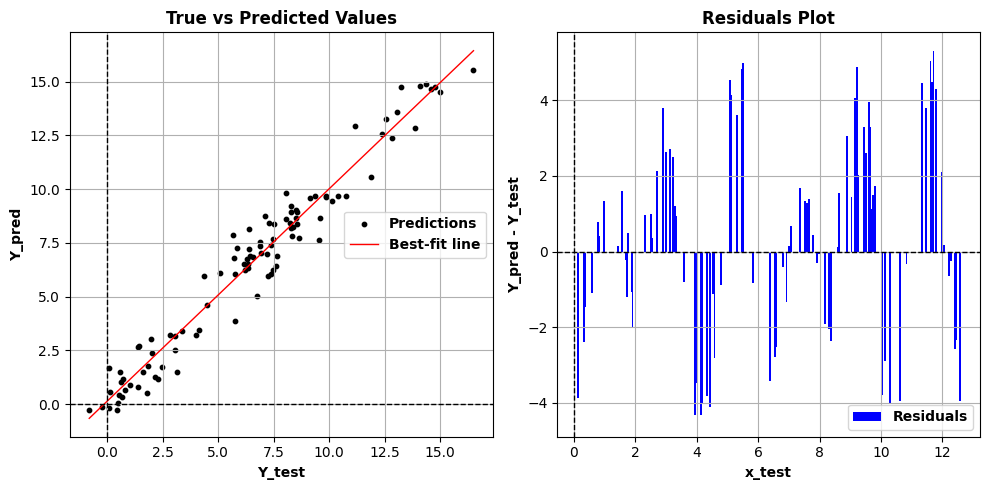

In [ ]:
# Creating figure and subplots
X = np.linspace(min(y_test), max(y_test), 250)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# First subplot: Predictions vs True values
ax1.scatter(y_test.reshape(-1), y_pred, color = "black", label = "Predictions", s = 10)
ax1.plot(X, linear_model.predict(X.reshape(-1, 1)), linestyle = "solid", color = "red", linewidth = 1, label = "Best-fit line")
ax1.legend(loc="best", prop={"weight": "bold", "size": 10})
ax1.set_title("True vs Predicted Values", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("Y_test", fontweight = "bold", fontsize = 10)
ax1.set_ylabel("Y_pred", fontweight = "bold", fontsize = 10)
ax1.axhline(linestyle = "dashed", linewidth = 1, color = "black")
ax1.axvline(linestyle = "dashed", linewidth = 1, color = "black")
ax1.grid()

# Second subplot: Residuals BAR plot
ax2.bar(x_test.reshape(-1), linear_model.predict(x_test) - y_test.reshape(-1), color = "blue", label = "Residuals", width = 0.06)
ax2.legend(loc = "best", prop={"weight": "bold", "size": 10})
ax2.set_title("Residuals Plot", fontweight = "bold", fontsize = 12)
ax2.set_xlabel("x_test", fontweight = "bold", fontsize = 10)
ax2.set_ylabel("Y_pred - Y_test", fontweight = "bold", fontsize = 10)
ax2.axhline(linestyle = "dashed", linewidth = 1, color = "black")
ax2.axvline(linestyle = "dashed", linewidth = 1, color = "black")
ax2.grid()

plt.tight_layout()
plt.show()